# **Analisis Exploratorio de Datos - Seoul Air Quality**

---
<div style="text-align: justify;">

A continuacion se presenta el Analisis exploratorio y descriptivo del dataset que contiene informacion de la calidad del aire de seul desde 1988 a 2021 [Ver dataset aqui.](https://www.kaggle.com/datasets/williamhyun/seoulairqualityhistoricdata/data)

</div>

In [ ]:
# Procedemos a cargar las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Carga del Dataset
#df = pd.read_csv(r"/content/seoul_air_1988_2021.csv")

In [ ]:
#Carga del Dataset
df=pd.read_csv('/content/drive/MyDrive/seoul_air_1988_2021.csv')

In [ ]:
sns.set_style("darkgrid")

Se escoje unicamente las columnas *$dt$*, *$loc$* y *$NO_2$* las cuales indican el año, mes, dia y hora de medicion y los niveles de Dioxido de nitrogeno en el aire en Seul.

In [ ]:
data=df[['dt','loc','no2']]
print('Column names:', data.columns)

Column names: Index(['dt', 'loc', 'no2'], dtype='object')


Teniendo en cuenta la totalidad de registros del dataset, se cuenta con 5984782 observaciones, sin embargo hay valores faltantes.

In [ ]:
#Vemos cuantas observaciones hay en el subset
print('Numero de filas y columnas: ', data.shape)

Numero de filas y columnas:  (5984782, 3)


<div style="text-align: justify;">

Sin embargo estos registros no pertenecen al mismo punto de medicion, ya que estan en diferentes ubicaciones geograficas, por tanto, vamos a seleccionar el punto de medicion asociado a la locacion que tenga mas registros e identificamos que es la 124, por tanto nos quedaremos con 288.736 registros.

<div>

In [ ]:
#Queremos ver cuantos valores unicos de loc existen.
data['loc'].unique()

array([103, 105, 107, 108, 113, 117, 122, 124, 116, 106, 109, 110, 119,
       123, 101, 102, 104, 121, 111, 112, 114, 115, 118, 120, 125])

In [ ]:
#Vemos que punto de medicion tiene mas datos y lo escogemos
data['loc'].value_counts()

,count
loc,
124,288736
113,288596
103,283130
117,282384
122,282372
108,282314
107,280973
105,279064
116,262952


In [ ]:
data=data[data['loc']==124]
data=data.drop(columns=['loc'])
data.shape

(288736, 2)

<div style="text-align: justify;">

Calculamos las medidas de tendencia central y observamos que los datos son cercanos al 0, incluso vemos que el tercer cuartil del dataset es de 0.042 mientras que el valor maximo es de 0.68, muy por encima del resto de datos, incluso vemos que solo un dato se encuentra por encima de 0.4 por tanto procedemos a reemplazar esta observacion por un valor vacio para luego ser imputado.

</div>

In [ ]:
data['no2'].describe()

,no2
count,281839.000000
mean,0.031775
std,0.017076
min,0.000000
25%,0.019000
50%,0.029000
75%,0.042000
max,0.687000


In [ ]:
data.loc[data['no2'] >0.4]

,dt,no2
68416,1989030822,0.687


In [ ]:
# REEMPLAZAMOS LOS VALORES (1) POR ENCIMA DE 0.6 COMO NAN
data.loc[data['no2'] > 0.3, 'no2'] = np.nan

Luego de hacer esto, vemos que el total de NA encontrados es de 6898 los cuales corresponden al 2.4% de las observaciones, por lo que se procede a imputar utilizando interpolacion cuadratica.

In [ ]:
#Calculamos el numero de NA en el dataframe
print('El numero total de NA es de',data['no2'].isna().sum())
print('Esto corresponde al ', round(data['no2'].isna().sum()*100/data.shape[0],2),'% total de las observaciones')

El numero total de NA es de 6898
Esto corresponde al  2.39 % total de las observaciones


In [ ]:
#Imputamos los datos faltantes con interpolacion cuadratica

data['no2'] = data['no2'].interpolate(option='quadratic')

In [ ]:
print('Numero de datos faltantes luego de la imputacion: ', data['no2'].isna().sum())

Numero de datos faltantes luego de la imputacion:  0


Tras estas imputaciones procedemos a recalcular las medidas de posicion y de tendencia central sin los valores faltantes y a graficar la distribucion de los valores de $NO_2$ por hora desde 1988.

In [ ]:
# Resumen de NO2 despues de imputar
data['no2'].describe()

,no2
count,288736.000000
mean,0.031783
std,0.017060
min,0.000000
25%,0.019000
50%,0.029000
75%,0.042000
max,0.204000


La distribución parece estar sesgada o tener una cola hacia los niveles más altos de $NO_2$, lo que podría indicar la presencia de valores atípicos o eventos con concentraciones inusualmente altas. Además, el rango de concentraciones de $NO_2$, va desde 0.00 hasta 0.20 ppm siendo la mayoria de los registros menores a 0.1 0 ppm.

<ipython-input-18-e63738f898ec>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(data['no2'], norm_hist=False)


Text(0.5, 0, 'Niveles de NO2')

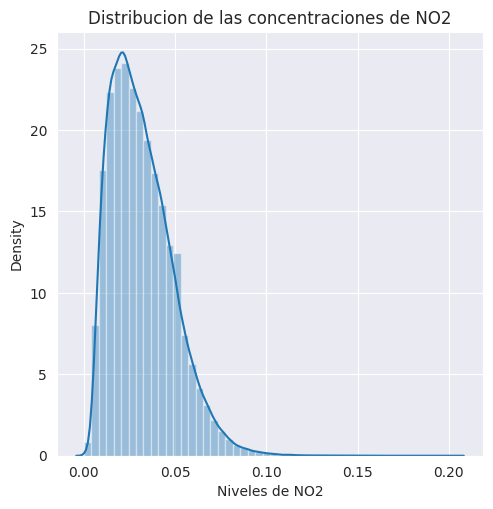

In [ ]:
#Graficamos la distribucion de concentraciones de NO2 en un histograma.
plt.figure(figsize=(5.5, 5.5))
g = sns.distplot(data['no2'], norm_hist=False)
g.set_title('Distribucion de las concentraciones de NO2');
plt.xlabel("Niveles de NO2")

Los puntos en el gráfico no siguen la línea diagonal de manera consistente, especialmente en ambas colas. Esto nos indica graficamente que los datos no se distribuyen de manera normal. Sin embargo comprobamos a traves de una prueba de Shapiro-Wilk que los datos no estan normalmente distribuidos.

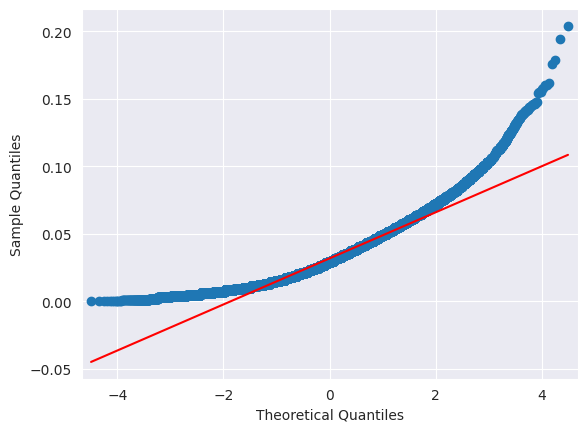

In [ ]:
#Hacemos un grafico de cuantiles para ver si existe normalidad
from statsmodels.graphics.gofplots import qqplot
qqplot(data['no2'], line='s')
plt.gca().get_lines()[1].set_color('red')
plt.show()

In [ ]:
#Comprobamos con una prueba que Los datos no son normales

from scipy.stats import shapiro

print('Shapiro-Wilk Test:')
stat, p = shapiro(data['no2'])
print('Statistics=%.6f, p=%e' % (stat, p))

alpha = 0.05
if p > alpha:
 print('Sample looks Normal (fail to reject H0)')
else:
 print('Sample does not look Normal (reject H0)')

Shapiro-Wilk Test:
Statistics=0.949551, p=3.083672e-114
Sample does not look Normal (reject H0)


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 288736.
  res = hypotest_fun_out(*samples, **kwds)


Con el fin de preparar los datos, procedemos a cambiar el formato de la fecha para poder aplicar de mejor forma los analisis y graficos de serie de tiempo y posteriormente se calculan las medias diarias y mensuales para ver el comportamiento de la variable de estudio en diferentes horizontes de tiempo.

In [ ]:
#Cambiamos el formato de la fecha

data['dt'] = pd.to_datetime(data['dt'].astype(str), format='%Y%m%d%H')

#establecer 'dt' como índice
data.set_index('dt', inplace=True)



In [ ]:
# Se generan las medias diarias
daily = data['no2'].resample('D')
daily_mean = daily.mean()

monthly = data['no2'].resample('M')
monthly_mean = monthly.mean()

<ipython-input-22-470424d8b25e>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = data['no2'].resample('M')


<div style="text-align: justify;">

 En la siguiente gráfica se observan tres series superpuestas en una seccion determinada de la serie de tiempo, estas series representan diferentes niveles de agregación temporal de las concentraciones de $NO_2$. La serie graficada en azul muestra las mediciones originales de $NO_2$ tomadas por hora. Se puede apreciar una alta variabilidad, con fluctuaciones significativas a lo largo del tiempo. Para suavizar la variabilidad horaria y resaltar patrones a más largo plazo, se calculó la media diaria (naranja) y mensual (rojo) de las concentraciones de $NO_2$, en esta gráfica podemos sospechar que no se encuentra una tendencia marcada pero que con las medias mensuales (rojo) se sospecha de un patrón estacional, esto será verificado mas adelante.

 Es importante mencionar que en la serie original (azul) no se observa alguna tendencia ya sea creciente o decreciente pero si se observan muchos picos lo que puede interpretarse como una serie con volatilidad principamente entre los valores de 0.00 ppm y 0.12 ppm.

</div>

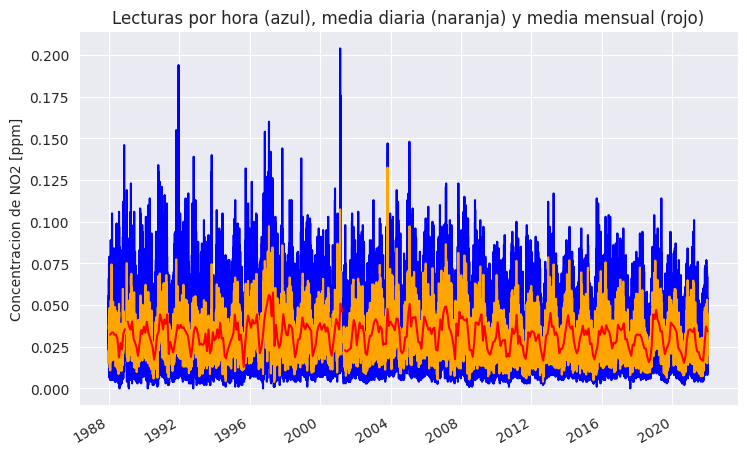

In [ ]:
#Grafico de mediciones completas vs medias diarias
fig = plt.figure(figsize=(8.5, 5.5))
ax = fig.add_subplot(1,1,1)
data['no2'].plot(ax=ax, color='blue')
daily_mean.plot(ax=ax, color='orange')
monthly_mean.plot(ax=ax, color='red')
ax.set_title('Lecturas por hora (azul), media diaria (naranja) y media mensual (rojo)');
ax.set_xlabel('');
ax.set_ylabel('Concentracion de NO2 [ppm]');

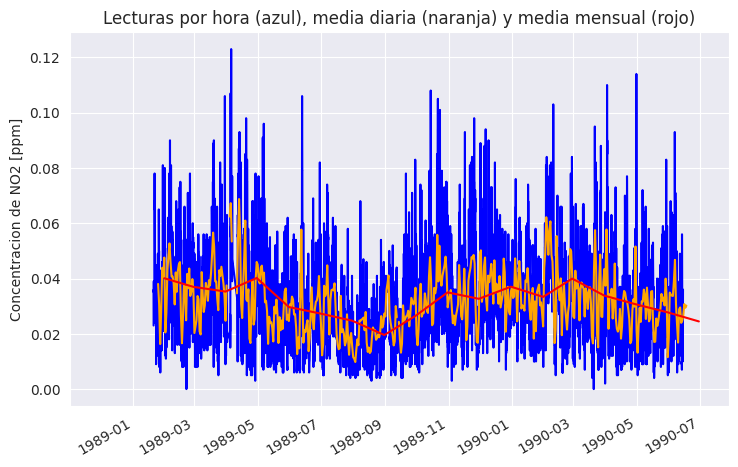

In [ ]:
#ZOOM de Grafico de mediciones completas vs medias diarias
fig = plt.figure(figsize=(8.5, 5.5))
ax = fig.add_subplot(1,1,1)
data['no2'][12*30*22:30*30*22].plot(ax=ax, color='blue')
daily_mean[13*30:30*30].plot(ax=ax, color='orange')
monthly_mean[10:30].plot(ax=ax, color='red')
ax.set_title('Lecturas por hora (azul), media diaria (naranja) y media mensual (rojo)');
ax.set_xlabel('');
ax.set_ylabel('Concentracion de NO2 [ppm]');

In [ ]:
#Calculamos una media movil semanal con un rolling de tamaño 7 para las medias diarias
weekly_moving_average = daily_mean.rolling(7).mean()


De forma mas amplia en la siguiente grafica se puede ver todas las lecturas de concentraciones de $NO_2$ por hora incluida con la media diaria, semanal y mensual.

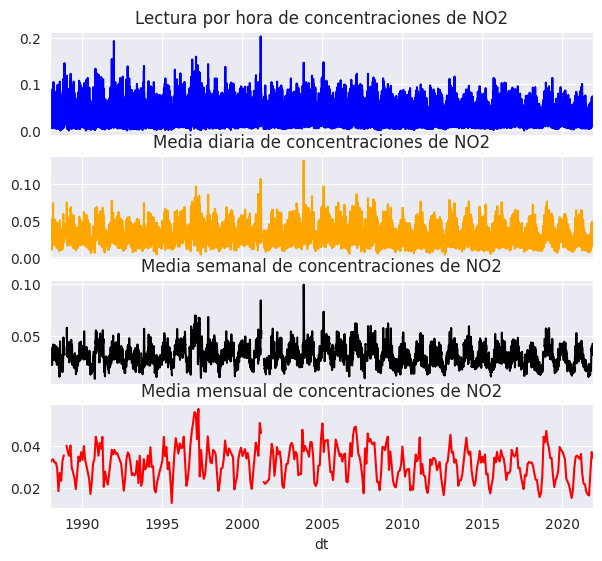

In [ ]:
#Graficamos las lecturas segun los diferentes umbrales de tiempo
fig, axarr = plt.subplots(4, sharex=True)
fig.set_size_inches(7, 7)


data['no2'].plot(ax=axarr[0], color='blue')
axarr[0].set_title('Lectura por hora de concentraciones de NO2');

daily_mean.plot(ax=axarr[1], color='orange')
axarr[1].set_title('Media diaria de concentraciones de NO2');

weekly_moving_average.plot(ax=axarr[2], color='black')
axarr[2].set_title('Media semanal de concentraciones de NO2');

monthly_mean.plot(ax=axarr[3], color='red')
axarr[3].set_title('Media mensual de concentraciones de NO2');

<Axes: >

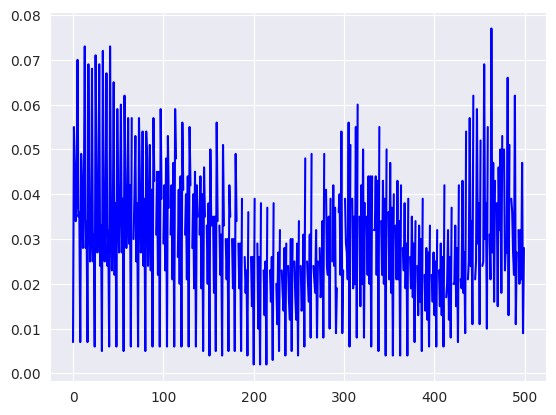

In [ ]:
#Hacemos un zoom de los datos de NO2 con los primeros 500 datos
df['no2'][0:500].plot(color='blue')

<div style="text-align: justify;">

Se modelo la tendencia de la serie de tiempo con una regresión lineal, en esta, los residuos del modelo de tendencia aplicado a las concentraciones de $NO_2$ oscilan entre 0.15 y -0.05. Es importante verificar si los residuos muestran algún patrón o autocorrelación que indique la presencia de estructura adicional no capturada por el modelo. Se recomienda realizar pruebas de autocorrelación y ruido blanco en los residuos para validar la adecuación del modelo y, en caso de ser necesario, incorporar términos adicionales como componentes estacionales o de media móvil.

</div>

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np


Trend model coefficient=-1.2527556778387919e-08 and intercept=0.033591325156384674


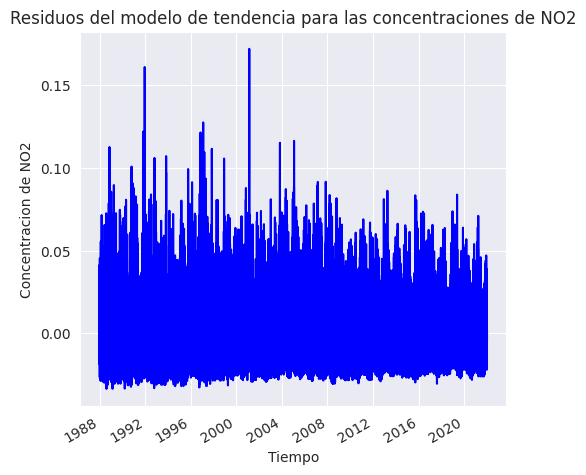

In [ ]:
# Ajustamos la línea de tendencia.
#Para ello importamos la clase LinearRegression de scikit-learn y ajustamos un modelo lineal al índice temporal
trend_model = LinearRegression(fit_intercept=True)
trend_model.fit(np.arange(data.shape[0]).reshape((-1,1)), data['no2'])

#Coeficientes del modelo
print('Trend model coefficient={} and intercept={}'.format(trend_model.coef_[0], trend_model.intercept_))

# Residuales obtenido a partir del modelo de línea de tendencia
residuals = np.array(data['no2']) - trend_model.predict(np.arange(data.shape[0]).reshape((-1,1)))

# Grafico de los residuales

plt.figure(figsize=(5.5, 5.5))
pd.Series(data=residuals, index=data.index).plot(color='b')
plt.title('Residuos del modelo de tendencia para las concentraciones de NO2')
plt.xlabel('Tiempo')
plt.ylabel('Concentracion de NO2')
plt.xticks(rotation=30);

##  **Gráfico de subserie estacional**

<div style="text-align: justify;">

En adición a lo visto con anterioridad, se presentan las concentraciones de $NO_2$ por trimestre en donde vemos que dependiendo del trimestre de medición se obtuvieron diferentes medias de concentración de $NO_2$, cabe resaltar que al tomar las medias por mes y por trimestre la serie temporal se comporta de forma diferente a si se toman los datos por hora (el cual es la serie original).

</div>

In [ ]:
#Creamos las columnas month ,year, residual y quarter para futuros analisis
data['month'] = data.index.month
data['Residuals'] = residuals
month_quarter_map = {1: 'Q1', 2: 'Q1', 3: 'Q1',
                     4: 'Q2', 5: 'Q2', 6: 'Q2',
                     7: 'Q3', 8: 'Q3', 9: 'Q3',
                     10: 'Q4', 11: 'Q4', 12: 'Q4'}
data['Quarter'] = data['month'].map(lambda m: month_quarter_map.get(m))

data['Year'] = data.index.year

# Se calculan la media estacional y las desviaciones típicas, agrupando los datos por Year y Quarter.

seasonal_sub_series_data = data.groupby(by=['Year', 'Quarter'])['Residuals'].aggregate([np.mean, np.std])
seasonal_sub_series_data.columns = ['Quarterly Mean', 'Quarterly Standard Deviation']

# Creamos índices de filas de seasonal_sub_series_data utilizando Year & Quarter

seasonal_sub_series_data.reset_index(inplace=True)
seasonal_sub_series_data.index = seasonal_sub_series_data['Year'].astype(str) + '-' + seasonal_sub_series_data['Quarter']
seasonal_sub_series_data.head()

<ipython-input-52-e99b750f1073>:14: FutureWarning: The provided callable <function mean at 0x7de08716eac0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  seasonal_sub_series_data = data.groupby(by=['Year', 'Quarter'])['Residuals'].aggregate([np.mean, np.std])
<ipython-input-52-e99b750f1073>:14: FutureWarning: The provided callable <function std at 0x7de08716ec00> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  seasonal_sub_series_data = data.groupby(by=['Year', 'Quarter'])['Residuals'].aggregate([np.mean, np.std])


,Year,Quarter,Quarterly Mean,Quarterly Standard Deviation
1988-Q1,1988,Q1,-0.000493,0.015017
1988-Q2,1988,Q2,-0.002120,0.015765
1988-Q3,1988,Q3,-0.010554,0.014644
1988-Q4,1988,Q4,0.000293,0.016284
1989-Q1,1989,Q1,0.003999,0.016259


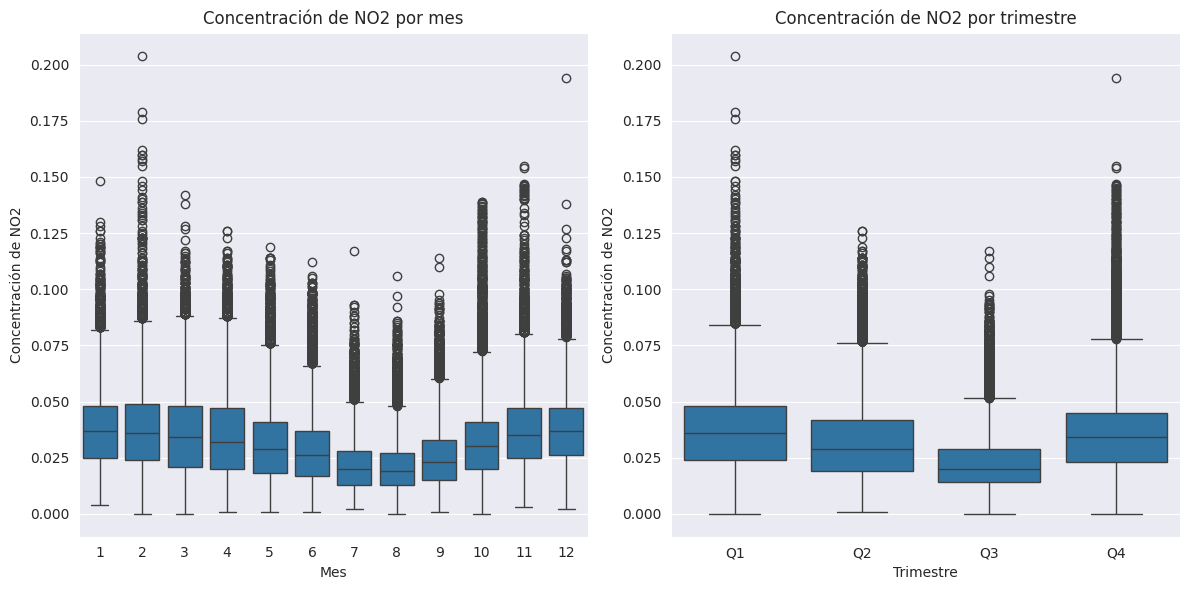

In [ ]:
plt.figure(figsize=(12, 6))

# Primer gráfico (Concentración de NO2 por mes)
plt.subplot(1, 2, 1)  # (filas, columnas, índice de gráfico)
g = sns.boxplot(data=data[data['Year'] > 1974], y='no2', x='month')
g.set_title('Concentración de NO2 por mes')
g.set_xlabel('Mes')
g.set_ylabel('Concentración de NO2')

# Segundo gráfico (Concentración de NO2 por trimestre)
plt.subplot(1, 2, 2)  # (filas, columnas, índice de gráfico)
g = sns.boxplot(data=data[data['Year'] > 1974], y='no2', x='Quarter')
g.set_title('Concentración de NO2 por trimestre')
g.set_xlabel('Trimestre')
g.set_ylabel('Concentración de NO2')

# Muestra los gráficos
plt.tight_layout()  # Ajusta el espacio entre gráficos para que no se solapen
plt.show()

In [ ]:
#Comparacion de medias por trimestre
from scipy import stats

grouped = [group['no2'].values for name, group in data.groupby('Quarter')]

# Realizar la prueba ANOVA de un solo factor
f_statistic, p_value = stats.f_oneway(*grouped)

# Mostrar los resultados
print(f"Estadístico F: {f_statistic}")
print(f"Valor p: {p_value}")

Estadístico F: 11670.487907964542
Valor p: 0.0


## **Estacionareidad y prueba de Dickey-Fuller**

In [ ]:
# Instalamos LaTex para las graficas
!apt-get install texlive texlive-latex-extra texlive-fonts-recommended dvipng cm-super

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
cm-super is already the newest version (0.3.4-17).
dvipng is already the newest version (1.15-1.1).
texlive is already the newest version (2021.20220204-1).
texlive-fonts-recommended is already the newest version (2021.20220204-1).
texlive-latex-extra is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


<div style="text-align: justify;">

El análisis de los histogramas de la serie temporal $y_{t+k}$ para
$k=0,1,2,3,4,5$ sugiere que la distribución de la variable se mantiene estable a lo largo del tiempo. La forma de los histogramas no muestra cambios significativos, lo que indica una dinámica estacionaria o con baja variabilidad en su estructura. No se observa un desplazamiento evidente en la media o la dispersión de los datos, lo que sugiere que la serie no tiene tendencias marcadas ni cambios abruptos. Esto es relevante para el modelado, ya que implica que métodos estadísticos que asumen estacionalidad (La cual se confirmara con la prueba de Dickey Fuller) pueden ser adecuados para su análisis y predicción.

</div>

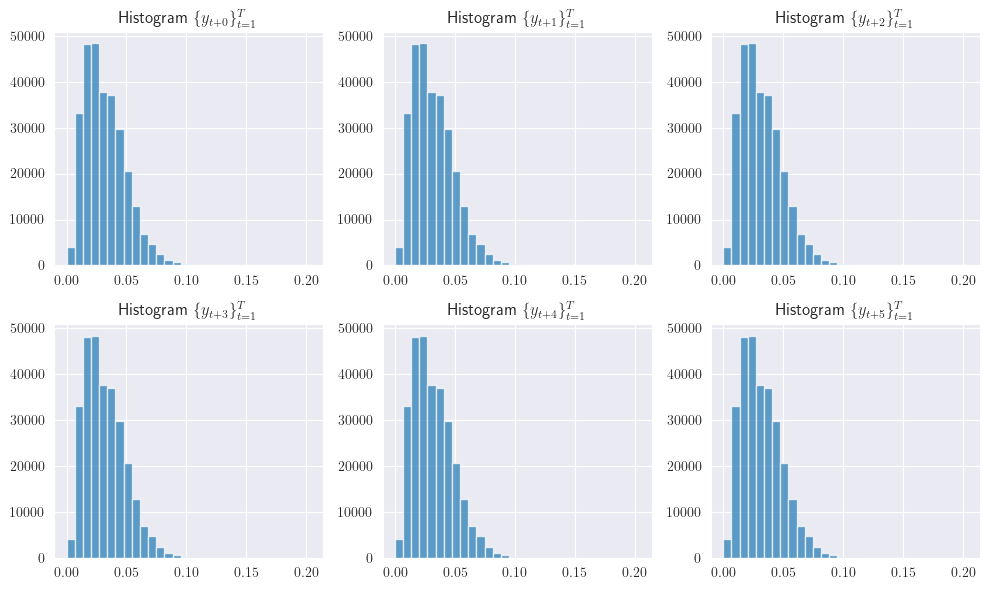

In [ ]:
from pandas.plotting import autocorrelation_plot

plt.rcParams['text.usetex'] = True  # Activa LaTeX para los títulos

fig, axs = plt.subplots(2, 3, figsize=(10, 6))  # Crea una cuadrícula de 3x2 gráficos

for i, ax in enumerate(axs.flat):
    ax.hist(hourly.iloc[i:], bins=30, alpha=0.7)  # Histograma con subconjuntos de 'no2'
    ax.set_title(r'Histogram $\{y_{t+%d}\}_{t=1}^{T}$' % (i))  # Título en LaTeX

plt.tight_layout()  # Ajusta la distribución de los gráficos
plt.show()  # Muestra la figura

plt.rcParams['text.usetex'] = False  # Desactiva LaTeX

In [ ]:
from statsmodels.tsa import stattools


<div style="text-align: justify;">

Se desea verificar la estacionalidad de las mediciones por hora de las concentraciones de $NO_2$ por lo que se realiza una prueba Dickey fuller para confirmar la estacionalidad.  En los resultados de la prueba de Dickey-Fuller para la concentración de $NO_2$, obtuvimos un valor p menor a 0.0001 sin diferenciar los datos, lo que indica que podemos rechazar la hipótesis nula de que la serie tiene una raíz unitaria (es decir, que la serie no es estacionaria) al nivel de significancia del 5\%. Esto nos confirma que la serie es estacionaria.

</div>


In [ ]:
#Prueba de D. Fuller
adf_result = stattools.adfuller(hourly, autolag='AIC')

#Dado que el p valor es menor al nivel de significancia se rechaza H0 en favor de la alternativa, es decir la variable es estacionaria
print('p-val of the ADF test in no2 concentration:', adf_result[1])

p-val of the ADF test in no2 concentration: 0.0


## **Funciones de autocorrelacion y Autocorrelacion parcial**

<div style="text-align: justify;">

La función de autocorrelación (ACF) muestra autocorrelación significativa (En la prueba de Ljung-Box) en varios lags, lo que sugiere la presencia de una estructura de dependencia temporal en la serie. Por otro lado, la función de autocorrelación parcial (PACF) muestra autocorrelación parcial significativa en algunos lags, lo que indica la posible presencia de un componente autorregresivo (AR). La prueba de Dickey-Fuller (DF) confirma que la serie es estacionaria, lo que indica que no presenta tendencia o raíz unitaria.  Estos resultados no son contradictorios, sino que reflejan que la serie, aunque estacionaria, tiene una dependencia temporal que podría ser capturada por modelos que se presentaran a continuación.

</div>

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
!pip install --upgrade statsmodels matplotlib

In [ ]:
hourly = data['no2']

In [ ]:
#calculamos diferencias de primer orden para la media mensual
first_order_diff =hourly.diff(1)
first_order_diff=first_order_diff[1:]

<div style="text-align: justify;">

El análisis de la función de autocorrelación (ACF) y la autocorrelación parcial (PACF) sugiere que la serie de $NO_2$ por hora presenta una fuerte dependencia temporal. La ACF de la serie original muestra un decaimiento exponencial y/o sinusoides amortiguadas, mientras que la PACF presenta un pico significativo en el primer y segundo rezago, lo que segun lo visto graficamente, un modelo auto-regresivo podría ser útil para modelar esta serie de tiempo pero debe ser confirmado con pruebas estadisticas.

</div>

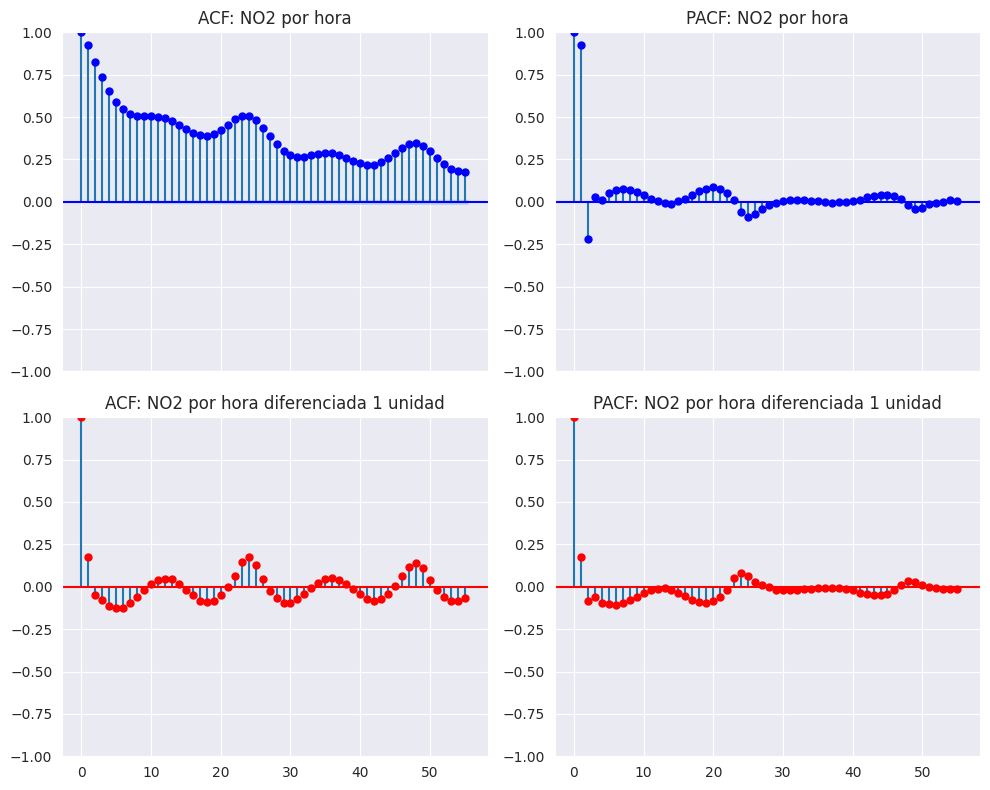

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8), sharex=True)

# ACF Plots
plot_acf(hourly, color='b', ax=ax[0, 0])
ax[0, 0].set_title('ACF: NO2 por hora')

plot_acf(first_order_diff, color='r', ax=ax[1, 0])
ax[1, 0].set_title('ACF: NO2 por hora diferenciada 1 unidad')

#plot_acf(second_order_diff, color='r', ax=ax[2, 0])
#ax[2, 0].set_title('ACF: NO2 por hora diferenciada a 2 unidades')

# PACF Plots

plot_pacf(hourly, color='b', ax=ax[0, 1])
ax[0, 1].set_title('PACF: NO2 por hora')

plot_pacf(first_order_diff.iloc[1:], color='r', ax=ax[1, 1])
ax[1, 1].set_title('PACF: NO2 por hora diferenciada 1 unidad')

plt.tight_layout()
plt.show()

### **Pruebas de Ljung-Box - ACF**

In [ ]:
from statsmodels.tsa import stattools

acf, confint, qstat, pvalues = stattools.acf(hourly,
                                             nlags=30,
                                             qstat=True,
                                             alpha=0.05)

In [ ]:
alpha = 0.05
for l, p_val in enumerate(pvalues.flatten()):
    if p_val > alpha:
        print(f'Null hypothesis is accepted at lag = {l} for p-val = {p_val}')
    else:
        print(f'Null hypothesis is rejected at lag = {l} for p-val = {p_val}')

Null hypothesis is accepted at lag = 0 for p-val = 1.0
Null hypothesis is accepted at lag = 1 for p-val = 1.0
Null hypothesis is accepted at lag = 2 for p-val = 0.9225907974812425
Null hypothesis is accepted at lag = 3 for p-val = 0.9298858364950736
Null hypothesis is rejected at lag = 4 for p-val = -0.2235441100766883
Null hypothesis is rejected at lag = 5 for p-val = -0.2162490710628572
Null hypothesis is rejected at lag = 6 for p-val = 0.02601464456530671
Null hypothesis is rejected at lag = 7 for p-val = 0.0333096835791378
Null hypothesis is rejected at lag = 8 for p-val = 0.0070696734067178905
Null hypothesis is rejected at lag = 9 for p-val = 0.014364712420548983
Null hypothesis is accepted at lag = 10 for p-val = 0.05019846046361191
Null hypothesis is accepted at lag = 11 for p-val = 0.057493499477443005
Null hypothesis is accepted at lag = 12 for p-val = 0.06351809385541113
Null hypothesis is accepted at lag = 13 for p-val = 0.0708131328692422
Null hypothesis is accepted at lag

### **Pruebas de Ljung-Box - PACF**

In [ ]:
from statsmodels.tsa import stattools

pacf, pvalues_pacf = stattools.pacf(hourly,
                                             nlags=30,
                                             alpha=0.05)

In [ ]:
alpha = 0.05
for l, p_val in enumerate(pvalues_pacf.flatten()):  # Convertimos a 1D si es necesario
    if p_val > alpha:
        print(f'Null hypothesis is accepted at lag = {l} for p-val = {p_val}')
    else:
        print(f'Null hypothesis is rejected at lag = {l} for p-val = {p_val}')

Null hypothesis is accepted at lag = 0 for p-val = 1.0
Null hypothesis is accepted at lag = 1 for p-val = 1.0
Null hypothesis is accepted at lag = 2 for p-val = 0.9225907974812425
Null hypothesis is accepted at lag = 3 for p-val = 0.9298858364950736
Null hypothesis is rejected at lag = 4 for p-val = -0.2235441100766883
Null hypothesis is rejected at lag = 5 for p-val = -0.2162490710628572
Null hypothesis is rejected at lag = 6 for p-val = 0.02601464456530671
Null hypothesis is rejected at lag = 7 for p-val = 0.0333096835791378
Null hypothesis is rejected at lag = 8 for p-val = 0.0070696734067178905
Null hypothesis is rejected at lag = 9 for p-val = 0.014364712420548983
Null hypothesis is accepted at lag = 10 for p-val = 0.05019846046361191
Null hypothesis is accepted at lag = 11 for p-val = 0.057493499477443005
Null hypothesis is accepted at lag = 12 for p-val = 0.06351809385541113
Null hypothesis is accepted at lag = 13 for p-val = 0.0708131328692422
Null hypothesis is accepted at lag


```{tableofcontents}
```
